Line-level text & document metadata extraction

In [5]:
!pip -q install pdfplumber pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.2 MB/s eta 0:00:00


In [6]:
import pdfplumber
from pypdf import PdfReader

print("pdfplumber:", pdfplumber.__version__)
print("pypdf imported successfully")

pdfplumber: 0.11.9
pypdf imported successfully


In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample-tables.pdf to sample-tables.pdf


In [7]:
pdf_path = next(iter(uploaded.keys()))
pdf_path

'sample-tables.pdf'

In [8]:
with pdfplumber.open(pdf_path) as pdf:
    print("Pages:", len(pdf.pages))

Pages: 11


In [9]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    print("Page size:", page.width, page.height)

Page size: 612.0 792.0


In [10]:
# bbox = (x0, top, x1, bottom)
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    bbox = (0, 110, page.width, 420)

bbox

(0, 110, 612.0, 420)

In [11]:
import pdfplumber
import pandas as pd

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    cropped = page.crop(bbox)

    chars = cropped.chars  # list of character-level objects with metadata

print("Total chars inside bbox:", len(chars))

# Show a few raw examples
chars[:5]

Total chars inside bbox: 478


[{'matrix': (19.98, 0.0, 0.0, 19.98, 90.0, 687.9),
  'fontname': 'IRFKFD+Verdana,Bold',
  'adv': 0.8300000000000001,
  'upright': True,
  'x0': 90.0,
  'y0': 681.84606,
  'x1': 106.5834,
  'y1': 701.82606,
  'width': 16.583399999999997,
  'height': 0.15394000000003416,
  'size': 19.980000000000018,
  'mcid': 0,
  'tag': 'H1',
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'ICCBased',
  'text': 'D',
  'stroking_color': (0,),
  'non_stroking_color': (0.0,),
  'top': 110,
  'bottom': 110.15394000000003,
  'doctop': 110.0},
 {'matrix': (19.98, 0.0, 0.0, 19.98, 106.56342000000001, 687.9),
  'fontname': 'IRFKFD+Verdana,Bold',
  'adv': 0.664,
  'upright': True,
  'x0': 106.56342000000001,
  'y0': 681.84606,
  'x1': 119.83014000000001,
  'y1': 701.82606,
  'width': 13.266720000000007,
  'height': 0.15394000000003416,
  'size': 19.980000000000018,
  'mcid': 0,
  'tag': 'H1',
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'ICCBased',
  'text': 'e',
  'stroking_color': (0,),
  'non_

In [12]:
rows = []
for c in chars:
    rows.append({
        "text": c.get("text"),
        "fontname": c.get("fontname"),
        "size": c.get("size"),
        "x0": c.get("x0"),
        "top": c.get("top"),
        "x1": c.get("x1"),
        "bottom": c.get("bottom"),
    })

df = pd.DataFrame(rows)

# quick view
df.head(20)

,text,fontname,size,x0,top,x1,bottom
0,D,"IRFKFD+Verdana,Bold",19.98,90.00000,110.00000,106.58340,110.15394
1,e,"IRFKFD+Verdana,Bold",19.98,106.56342,110.00000,119.83014,110.15394
2,s,"IRFKFD+Verdana,Bold",19.98,119.83014,110.00000,131.67828,110.15394
3,i,"IRFKFD+Verdana,Bold",19.98,131.71824,110.00000,138.55140,110.15394
4,g,"IRFKFD+Verdana,Bold",19.98,138.61134,110.00000,152.57736,110.15394
5,n,"IRFKFD+Verdana,Bold",19.98,152.57736,110.00000,166.80312,110.15394
6,,"IRFKFD+Verdana,Bold",19.98,166.80312,110.00000,173.63628,110.15394
7,a,"IRFKFD+Verdana,Bold",19.98,173.63628,110.00000,186.98292,110.15394
8,n,"IRFKFD+Verdana,Bold",19.98,187.02288,110.00000,201.24864,110.15394
9,d,"IRFKFD+Verdana,Bold",19.98,201.24864,110.00000,215.21466,110.15394


In [13]:
df.groupby(["fontname", "size"]).size().reset_index(name="count").sort_values("count", ascending=False).head(20)

,fontname,size,count
0,"IRFKFD+Verdana,Bold",10.02,146
2,"IRFKFD+Verdana,Bold",10.98,96
1,"IRFKFD+Verdana,Bold",10.98,61
8,Verdana,10.98,60
9,XPHHDD+Georgia,10.98,52
4,"IRFKFD+Verdana,Bold",19.98,41
3,"IRFKFD+Verdana,Bold",16.02,14
6,Verdana,6.48,6
5,Times_Roman,10.02,1
7,Verdana,10.02,1


In [14]:
# Extract words from the cropped region
words = cropped.extract_words(
    keep_blank_chars=False,
    use_text_flow=True,
    extra_attrs=["fontname", "size"]
)

print("Total words inside bbox:", len(words))
words[:10]

Total words inside bbox: 76


[{'text': 'Design',
  'x0': 90.0,
  'x1': 166.80312,
  'top': 110,
  'doctop': 110.0,
  'bottom': 110.15394000000003,
  'upright': True,
  'height': 0.15394000000003416,
  'width': 76.80312,
  'direction': 'ltr',
  'fontname': 'IRFKFD+Verdana,Bold',
  'size': 19.980000000000018},
 {'text': 'and',
  'x0': 173.63628,
  'x1': 215.21466,
  'top': 110,
  'doctop': 110.0,
  'bottom': 110.15394000000003,
  'upright': True,
  'height': 0.15394000000003416,
  'width': 41.57838000000001,
  'direction': 'ltr',
  'fontname': 'IRFKFD+Verdana,Bold',
  'size': 19.980000000000018},
 {'text': 'build',
  'x0': 222.06779999999998,
  'x1': 277.97184,
  'top': 110,
  'doctop': 110.0,
  'bottom': 110.15394000000003,
  'upright': True,
  'height': 0.15394000000003416,
  'width': 55.90404000000001,
  'direction': 'ltr',
  'fontname': 'IRFKFD+Verdana,Bold',
  'size': 19.980000000000018},
 {'text': 'accessible',
  'x0': 90.0,
  'x1': 204.80508,
  'top': 114.46961999999996,
  'doctop': 114.46961999999996,
  'bot

In [15]:
import pandas as pd

wdf = pd.DataFrame(words)
wdf

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,fontname,size
0,Design,90.00000,166.80312,110.00000,110.00000,110.15394,True,0.15394,76.80312,ltr,"IRFKFD+Verdana,Bold",19.98
1,and,173.63628,215.21466,110.00000,110.00000,110.15394,True,0.15394,41.57838,ltr,"IRFKFD+Verdana,Bold",19.98
2,build,222.06780,277.97184,110.00000,110.00000,110.15394,True,0.15394,55.90404,ltr,"IRFKFD+Verdana,Bold",19.98
3,accessible,90.00000,204.80508,114.46962,114.46962,134.44962,True,19.98000,114.80508,ltr,"IRFKFD+Verdana,Bold",19.98
4,PDF,211.63824,255.89394,114.46962,114.46962,134.44962,True,19.98000,44.25570,ltr,"IRFKFD+Verdana,Bold",19.98
...,...,...,...,...,...,...,...,...,...,...,...,...
71,44.7,412.14000,433.01298,395.42694,395.42694,406.40694,True,10.98000,20.87298,ltr,XPHHDD+Georgia,10.98
72,35.91,479.58000,505.36104,395.42694,395.42694,406.40694,True,10.98000,25.78104,ltr,XPHHDD+Georgia,10.98
73,Payments,237.12000,292.51056,415.89606,415.89606,420.00000,True,4.10394,55.39056,ltr,"IRFKFD+Verdana,Bold",10.02
74,22.41,409.50000,435.63240,415.28694,415.28694,420.00000,True,4.71306,26.13240,ltr,XPHHDD+Georgia,10.98


In [16]:
# Round top to cluster words into the same line
wdf["line_id"] = wdf["top"].round(0)

lines = (
    wdf.sort_values(["line_id", "x0"])
      .groupby("line_id")
      .agg({
          "text": lambda x: " ".join(x),
          "fontname": lambda x: x.value_counts().index[0],
          "size": lambda x: x.value_counts().index[0],
          "x0": "min",
          "top": "min",
          "x1": "max",
          "bottom": "max",
      })
      .reset_index()
      .sort_values("top")
)

lines

,line_id,text,fontname,size,x0,top,x1,bottom
0,110.0,Design and build,"IRFKFD+Verdana,Bold",19.98,90.000,110.00000,277.97184,110.15394
1,114.0,accessible PDF tables,"IRFKFD+Verdana,Bold",19.98,90.000,114.46962,331.13862,134.44962
2,141.0,Sample tables,"IRFKFD+Verdana,Bold",16.02,90.000,140.51406,216.44586,156.53406
3,186.0,Table 1,"IRFKFD+Verdana,Bold",10.98,90.000,185.78694,135.18270,196.76694
4,207.0,Column header (TH) Column header (TH) Column h...,"IRFKFD+Verdana,Bold",10.98,90.000,207.02694,510.91584,218.00694
5,224.0,Row header (TH) Data cell (TD) Data cell (TD),Verdana,10.98,90.000,224.00694,462.47400,234.98694
6,241.0,Row header(TH) Data cell (TD) Data cell (TD),Verdana,10.98,90.000,240.98694,462.47400,251.96694
7,285.0,Table 2: example of footnotes referenced from ...,"IRFKFD+Verdana,Bold",10.98,90.000,285.32684,466.80066,296.30684
8,304.0,1,Verdana,6.48,515.114,304.06344,519.23528,310.54344
9,306.0,Expenditure by function £ million 2009/10 2010/11,"IRFKFD+Verdana,Bold",10.02,90.000,306.09606,512.56902,316.11606


In [17]:
def clamp_bbox_to_page(bbox, page):
    """
    Ensures bbox is fully inside the page bounds.
    bbox: (x0, top, x1, bottom)
    """
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    # Ensure proper ordering
    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)

def bbox_overlap(a, b):
    # a, b are (x0, top, x1, bottom)
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    """
    Extract line-level metadata from text inside a bounding box.

    bbox format: (x0, top, x1, bottom) in pdfplumber coordinates
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": [],
                "message": "No text found inside bbox"
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: x.value_counts().index[0],
                  "size": lambda x: x.value_counts().index[0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }

In [18]:
result = extract_bbox_text_metadata(pdf_path, page_number=0, bbox=bbox)
result

{'page_number': 0,
 'bbox': (0, 110, 612.0, 420),
 'lines': [{'text': 'Design and build',
   'fontname': 'IRFKFD+Verdana,Bold',
   'size': 19.980000000000018,
   'x0': 90.0,
   'top': 110.0,
   'x1': 277.97184,
   'bottom': 110.15394000000003},
  {'text': 'accessible PDF tables',
   'fontname': 'IRFKFD+Verdana,Bold',
   'size': 19.980000000000018,
   'x0': 90.0,
   'top': 114.46961999999996,
   'x1': 331.13862,
   'bottom': 134.44961999999998},
  {'text': 'Sample tables',
   'fontname': 'IRFKFD+Verdana,Bold',
   'size': 16.019999999999982,
   'x0': 90.0,
   'top': 140.51405999999997,
   'x1': 216.44585999999998,
   'bottom': 156.53405999999995},
  {'text': 'Table 1',
   'fontname': 'IRFKFD+Verdana,Bold',
   'size': 10.980000000000018,
   'x0': 90.0,
   'top': 185.78694000000007,
   'x1': 135.1827,
   'bottom': 196.7669400000001},
  {'text': 'Column header (TH) Column header (TH) Column header (TH)',
   'fontname': 'IRFKFD+Verdana,Bold',
   'size': 10.980000000000018,
   'x0': 90.0,
   

In [19]:
import json

print(json.dumps(result, indent=2))

{
  "page_number": 0,
  "bbox": [
    0,
    110,
    612.0,
    420
  ],
  "lines": [
    {
      "text": "Design and build",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 19.980000000000018,
      "x0": 90.0,
      "top": 110.0,
      "x1": 277.97184,
      "bottom": 110.15394000000003
    },
    {
      "text": "accessible PDF tables",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 19.980000000000018,
      "x0": 90.0,
      "top": 114.46961999999996,
      "x1": 331.13862,
      "bottom": 134.44961999999998
    },
    {
      "text": "Sample tables",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 16.019999999999982,
      "x0": 90.0,
      "top": 140.51405999999997,
      "x1": 216.44585999999998,
      "bottom": 156.53405999999995
    },
    {
      "text": "Table 1",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 10.980000000000018,
      "x0": 90.0,
      "top": 185.78694000000007,
      "x1": 135.1827,
      "bottom": 196.7669400000001
    },
  

In [20]:
out_path = "bbox_metadata_page0.json"

with open(out_path, "w") as f:
    json.dump(result, f, indent=2)

out_path

'bbox_metadata_page0.json'

In [21]:
from pypdf import PdfReader

def extract_pdf_document_metadata(pdf_path):
    reader = PdfReader(pdf_path)
    meta = reader.metadata  # DocumentInformation

    # Convert to normal dict (and stringify values safely)
    out = {}
    if meta:
        for k, v in meta.items():
            out[str(k)] = str(v)
    return out

doc_meta = extract_pdf_document_metadata(pdf_path)
doc_meta

{'/Author': 'Ted Page',
 '/Company': 'Microsoft',
 '/CreationDate': "D:20120325084639+01'00'",
 '/Creator': 'Acrobat PDFMaker 10.1 for Word',
 '/Keywords': '',
 '/ModDate': "D:20170927225746+01'00'",
 '/Producer': 'Adobe PDF Library 10.0',
 '/SourceModified': 'D:20120325074627',
 '/Subject': '',
 '/Title': 'Design and build accessible PDF tables, sample tables'}

In [22]:
combined = {
    "pdf_path": pdf_path,
    "document_metadata": doc_meta,
    "bbox_extraction": result
}

import json
print(json.dumps(combined, indent=2))

{
  "pdf_path": "sample-tables.pdf",
  "document_metadata": {
    "/Author": "Ted Page",
    "/Company": "Microsoft",
    "/CreationDate": "D:20120325084639+01'00'",
    "/Creator": "Acrobat PDFMaker 10.1 for Word",
    "/Keywords": "",
    "/ModDate": "D:20170927225746+01'00'",
    "/Producer": "Adobe PDF Library 10.0",
    "/SourceModified": "D:20120325074627",
    "/Subject": "",
    "/Title": "Design and build accessible PDF tables, sample tables"
  },
  "bbox_extraction": {
    "page_number": 0,
    "bbox": [
      0,
      110,
      612.0,
      420
    ],
    "lines": [
      {
        "text": "Design and build",
        "fontname": "IRFKFD+Verdana,Bold",
        "size": 19.980000000000018,
        "x0": 90.0,
        "top": 110.0,
        "x1": 277.97184,
        "bottom": 110.15394000000003
      },
      {
        "text": "accessible PDF tables",
        "fontname": "IRFKFD+Verdana,Bold",
        "size": 19.980000000000018,
        "x0": 90.0,
        "top": 114.469619999999

Extract image element metadata & table structure


In [23]:
def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    """
    Returns embedded images that intersect bbox.
    bbox: (x0, top, x1, bottom)
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "page_number": page_number,
            "bbox": bbox,
            "image_count": len(results),
            "images": results
        }

In [24]:
def extract_bbox_table_signal(pdf_path, page_number, bbox):
    """
    Structural signal ONLY.
    Uses raw drawing primitives, not logical cells.
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        raw_rects = cropped.rects
        raw_lines = cropped.lines

        return {
            "page_number": page_number,
            "bbox": bbox,

            # RAW geometry counts (not cells)
            "raw_lines_count": len(raw_lines),
            "raw_rects_count": len(raw_rects),
            "curves_count": len(cropped.curves),

            # Heuristic gate only
            "likely_table": (len(raw_lines) + len(raw_rects)) > 15
        }

In [25]:
def rects_to_cell_candidates(rects, min_w=5, min_h=5):
    """
    Convert raw pdfplumber rects into candidate cell regions.
    Geometry-only. No text. No semantics.
    """
    candidates = []

    for i, r in enumerate(rects):
        w = r["x1"] - r["x0"]
        h = r["bottom"] - r["top"]

        # Ignore hairline borders
        if w < min_w or h < min_h:
            continue

        candidates.append({
            "candidate_id": i,
            "bbox": (r["x0"], r["top"], r["x1"], r["bottom"]),
            "width": w,
            "height": h
        })

    return candidates

In [26]:
def grid_cells_from_rects(cells, row_tol=6, col_tol=6):
    """
    Assign row and col indices to each cell using geometry only.
    """

    # --- compute centers ---
    for c in cells:
        x0, top, x1, bottom = c["bbox"]
        c["__cx"] = (x0 + x1) / 2
        c["__cy"] = (top + bottom) / 2

    # --- cluster rows ---
    rows = []
    for c in sorted(cells, key=lambda x: x["__cy"]):
        for r in rows:
            if abs(r[0]["__cy"] - c["__cy"]) <= row_tol:
                r.append(c)
                break
        else:
            rows.append([c])

    # --- cluster columns ---
    cols = []
    for c in sorted(cells, key=lambda x: x["__cx"]):
        for col in cols:
            if abs(col[0]["__cx"] - c["__cx"]) <= col_tol:
                col.append(c)
                break
        else:
            cols.append([c])

    # --- enforce visual order ---
    rows = sorted(rows, key=lambda r: r[0]["__cy"])
    cols = sorted(cols, key=lambda c: c[0]["__cx"])

    # --- assign indices ---
    for r_idx, row in enumerate(rows):
        for c in row:
            c["row"] = r_idx

    for c_idx, col in enumerate(cols):
        for c in col:
            c["col"] = c_idx

    # cleanup
    for c in cells:
        del c["__cx"]
        del c["__cy"]

    return {
        "rows": len(rows),
        "cols": len(cols),
        "cells": cells
    }

In [27]:
def filter_candidate_cells(rects, min_w=20, min_h=12):
    """
    Filters pdfplumber rects to keep likely table cell candidates.
    Does NOT delete small rects — only marks confidence.
    """
    candidates = []

    for r in rects:
        w = r["x1"] - r["x0"]
        h = r["bottom"] - r["top"]

        # Reject hairline borders outright
        if w < 2 or h < 2:
            continue

        candidate = dict(r)  # shallow copy

        candidate["is_strong_candidate"] = (
            w >= min_w and h >= min_h
        )

        candidates.append(candidate)

    return candidates

In [28]:
def extract_table_cells(pdf_path, page_number, bbox):
    """
    Build cell objects from rect geometry + text.
    Returns a list of cell dicts (no grid yet).
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox_clamped = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox_clamped)

        candidate_rects = filter_candidate_cells(cropped.rects)

        cells = []
        for i, r in enumerate(candidate_rects):
            cell_bbox = (r["x0"], r["top"], r["x1"], r["bottom"])

            text_part = extract_bbox_text_metadata(
                pdf_path, page_number, cell_bbox
            )

            cell_text = " ".join(
                line["text"] for line in text_part.get("lines", [])
            )

            cells.append({
                "cell_id": i,
                "bbox": cell_bbox,
                "text": cell_text,
                "text_lines": text_part.get("lines", [])
            })

        return cells

In [29]:
def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    table_part = extract_bbox_table_signal(pdf_path, page_number, bbox)

    tables = []

    if table_part["likely_table"]:
        cells = extract_table_cells(
            pdf_path, page_number, bbox
        )

        grid = grid_cells_from_rects(cells)

        tables.append({
            "table_id": 0,
            "grid": grid
        })

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": text_part.get("bbox", bbox),

        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),

        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),

        "tables": tables,
        "table_signal": table_part
    }

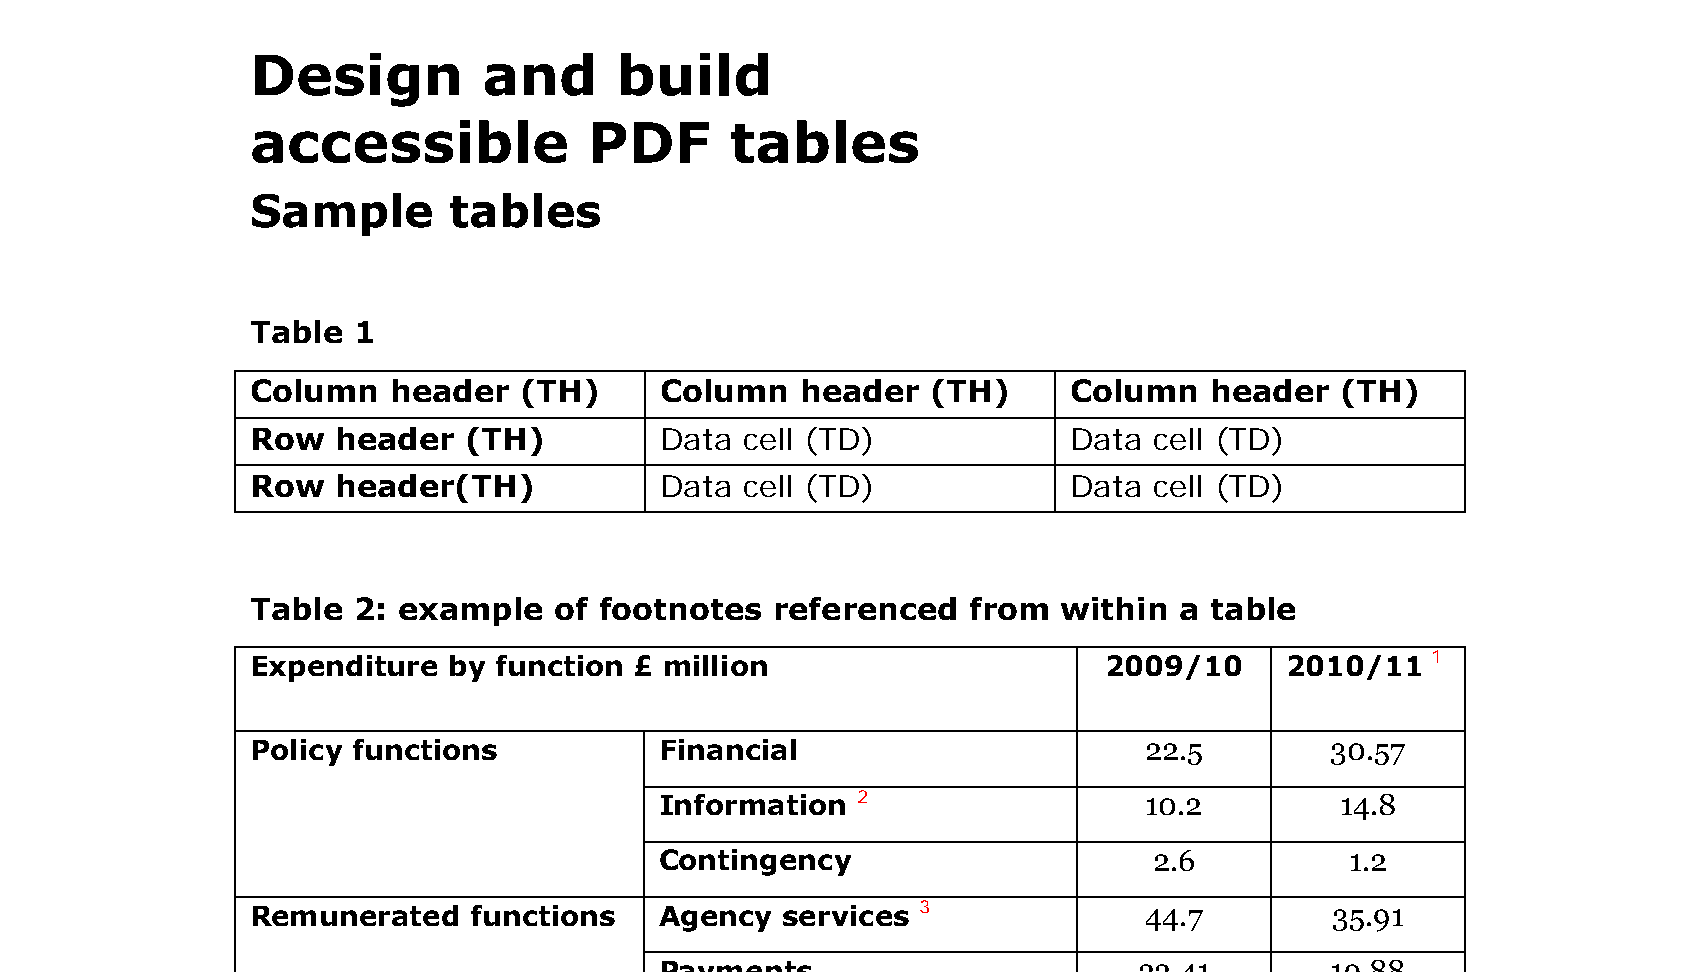

{
  "pdf_path": "sample-tables.pdf",
  "page_number": 0,
  "bbox": [
    0,
    70,
    612.0,
    420
  ],
  "text": [
    {
      "text": "Design and build",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 19.980000000000018,
      "x0": 90.0,
      "top": 90.17394000000002,
      "x1": 277.97184,
      "bottom": 110.15394000000003
    },
    {
      "text": "accessible PDF tables",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 19.980000000000018,
      "x0": 90.0,
      "top": 114.46961999999996,
      "x1": 331.13862,
      "bottom": 134.44961999999998
    },
    {
      "text": "Sample tables",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 16.019999999999982,
      "x0": 90.0,
      "top": 140.51405999999997,
      "x1": 216.44585999999998,
      "bottom": 156.53405999999995
    },
    {
      "text": "Table 1",
      "fontname": "IRFKFD+Verdana,Bold",
      "size": 10.980000000000018,
      "x0": 90.0,
      "top": 185.78694000000007,
      "x1": 135.1827

In [31]:
import json

# Example: pretend these coordinates came from UI/user
page_number = 0

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    bbox = (0, 70, page.width, 420)  # x0, top, x1, bottom
    display(page.crop(bbox).to_image(resolution=200))

result = extract_bbox_metadata(pdf_path, page_number=page_number, bbox=bbox)
print(json.dumps(result, indent=2))

In [32]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    print("Lines:", len(page.lines))
    print("Rects:", len(page.rects))
    print("Curves:", len(page.curves))

Lines: 0
Rects: 218
Curves: 0


In [33]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]

    raw_rects = page.rects
    rects = filter_candidate_cells(raw_rects)
    print("Total rects:", len(rects))

    # show first 10 rects only
    for r in rects[:10]:
        print({
            "x0": r["x0"],
            "top": r["top"],
            "x1": r["x1"],
            "bottom": r["bottom"],
            "width": r["width"],
            "height": r["height"]
        })

Total rects: 0


CLI Creation

In [ ]:
%%writefile extract_bbox_metadata.py
import argparse
import json
from collections import Counter

import pdfplumber
import pandas as pd


# -----------------------------
# Geometry helpers
# -----------------------------

def clamp_bbox_to_page(bbox, page):
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)


def bbox_overlap(a, b):
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0


# -----------------------------
# Text extraction
# -----------------------------

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": []
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: Counter(x).most_common(1)[0][0],
                  "size": lambda x: Counter(x).most_common(1)[0][0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }


# -----------------------------
# Image extraction
# -----------------------------

def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])
            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "image_count": len(results),
            "images": results
        }


# -----------------------------
# Table detection signal
# -----------------------------

def extract_bbox_table_signal(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        return {
            "lines_count": len(cropped.lines),
            "rects_count": len(cropped.rects),  # RAW rects (intentional)
            "curves_count": len(cropped.curves),
            "likely_table": (len(cropped.lines) + len(cropped.rects)) > 15
        }


# -----------------------------
# Table cell extraction
# -----------------------------

def filter_candidate_cells(rects, min_w=20, min_h=12):
    candidates = []
    for r in rects:
        w = r["width"]
        h = r["height"]

        if w < 2 or h < 2:
            continue

        if w >= min_w and h >= min_h:
            candidates.append(r)

    return candidates


def extract_table_cells_from_rects(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        rects = filter_candidate_cells(cropped.rects)

        cells = []
        for i, r in enumerate(rects):
            cell_bbox = (r["x0"], r["top"], r["x1"], r["bottom"])

            text_part = extract_bbox_text_metadata(
                pdf_path, page_number, cell_bbox
            )

            cell_text = " ".join(
                line["text"] for line in text_part.get("lines", [])
            )

            cells.append({
                "cell_id": i,
                "bbox": cell_bbox,
                "text": cell_text,
                "text_lines": text_part.get("lines", [])
            })

        return cells


# -----------------------------
# Unified extraction
# -----------------------------

def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    table_signal = extract_bbox_table_signal(pdf_path, page_number, bbox)

    tables = []
    if table_signal["likely_table"]:
        tables.append({
            "table_id": 0,
            "cells": extract_table_cells_from_rects(
                pdf_path, page_number, bbox
            )
        })

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": text_part.get("bbox", bbox),

        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),

        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),

        "tables": tables,
        "table_signal": table_signal
    }


# -----------------------------
# CLI
# -----------------------------

def main():
    parser = argparse.ArgumentParser(
        description="Extract metadata from a PDF region (bbox)"
    )

    parser.add_argument("--pdf", required=True)
    parser.add_argument("--page", type=int, required=True)
    parser.add_argument(
        "--bbox",
        nargs=4,
        type=float,
        required=True,
        metavar=("x0", "top", "x1", "bottom")
    )
    parser.add_argument("--out", default=None)

    args = parser.parse_args()
    print("ARGS:", args)

    result = extract_bbox_metadata(
        args.pdf,
        args.page,
        tuple(args.bbox)
    )

    if args.out:
        with open(args.out, "w") as f:
            json.dump(result, f, indent=2)
        print(f"Saved output to {args.out}")
    else:
        print(json.dumps(result, indent=2))


if __name__ == "__main__":
    main()

Overwriting extract_bbox_metadata.py


In [ ]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    W, H = page.width, page.height

!python extract_bbox_metadata.py --pdf "{pdf_path}" --page 0 --bbox 0 120 {W} 420

ARGS: Namespace(pdf='table.pdf', page=0, bbox=[0.0, 120.0, 612.0, 420.0], out=None)
{
  "pdf_path": "table.pdf",
  "page_number": 0,
  "bbox": [
    0,
    120.0,
    612.0,
    420.0
  ],
  "text": [
    {
      "text": "This is an example of a data table.",
      "fontname": "QDKTTN+Calibri",
      "size": 15.959999999999923,
      "x0": 72.0,
      "top": 120.0,
      "x1": 292.05647999999997,
      "bottom": 130.6562399999999
    },
    {
      "text": "Results",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 448.2,
      "top": 146.20799999999997,
      "x1": 484.188,
      "bottom": 158.20799999999997
    },
    {
      "text": "Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 311.4,
      "top": 153.76800000000003,
      "x1": 345.468,
      "bottom": 165.76800000000003
    },
    {
      "text": "Disability Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 90.0,
      "top": 161.0879999